CIS 9 - Lab 3: Unsupervised learning

In [149]:
# Name: Srinivas Jakkula

In [150]:
# import modules
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import numpy as np
from sklearn.cluster import KMeans

Create a k-means clustering model to find patterns of Amazon Prime TV shows. The input file is _tv.xlsx_, from [source](https://www.kaggle.com/nilimajauhari/amazon-prime-tv-shows)

In [151]:
#1. Read data from tv.xlsx, print the DataFrame
data = pd.read_excel("tv.xlsx")
# data
print(data.shape)
# data.head()
print(data)

(404, 8)
     S.no.           Name of the show  Year of release  \
0        1                 Pataal Lok           2020.0   
1        2                     Upload           2020.0   
2        3  The Marvelous Mrs. Maisel           2017.0   
3        4     Four More Shots Please           2019.0   
4        5                    Fleabag           2016.0   
..     ...                        ...              ...   
399    400                        NaN              NaN   
400    401                        NaN              NaN   
401    402                        NaN              NaN   
402    403                        NaN              NaN   
403    404                        NaN              NaN   

     No of seasons available Language          Genre  IMDb rating  \
0                        1.0    Hindi          Drama          7.5   
1                        1.0  English  Sci-fi comedy          8.1   
2                        3.0  English  Drama, Comedy          8.7   
3                 

In [152]:
# 2. Remove lines with NaN
# Print the DataFrame

# remove data records (rows) with NaN
cleanedData = data.dropna()
print(cleanedData, '\n')
# print(cleanedData.shape)

     S.no.                       Name of the show  Year of release  \
0        1                             Pataal Lok           2020.0   
1        2                                 Upload           2020.0   
2        3              The Marvelous Mrs. Maisel           2017.0   
3        4                 Four More Shots Please           2019.0   
4        5                                Fleabag           2016.0   
..     ...                                    ...              ...   
373    374                  The Danny Thomas Show           1958.0   
374    375  Hitoshi Matsumoto Presents Documental           2018.0   
375    376                  Businessmen VS Aliens           2018.0   
379    380                  Scooter: Secret Agent           2003.0   
383    384                        The Real McCoys           1958.0   

     No of seasons available  Language          Genre  IMDb rating  \
0                        1.0     Hindi          Drama          7.5   
1                  

In [153]:
# 3. We don't need the show number (S.no) and the name of the show, remove these columns.
# We also consider only shows with English as the language. Remove all lines where English is not the language.
# Then remove the Language column.
# Print the DataFrame
cleanedData = cleanedData.drop(columns=["S.no.", "Name of the show"])
#print(cleanedData)
clean_data = cleanedData[cleanedData.Language == 'English']
#print(clean_data)
clean_data = clean_data.drop(columns=["Language"])
print(clean_data)
clean_data

     Year of release  No of seasons available                   Genre  \
1             2020.0                      1.0           Sci-fi comedy   
2             2017.0                      3.0           Drama, Comedy   
4             2016.0                      2.0                  Comedy   
6             2018.0                      2.0                   Drama   
9             2019.0                      1.0  Drama, Romance, Comedy   
..               ...                      ...                     ...   
369           2017.0                      1.0                  Comedy   
371           2019.0                      1.0                  Comedy   
373           1958.0                      3.0                  Comedy   
379           2003.0                      1.0                  Comedy   
383           1958.0                      6.0                  Comedy   

     IMDb rating Age of viewers  
1            8.1            16+  
2            8.7            16+  
4            8.7     

,Year of release,No of seasons available,Genre,IMDb rating,Age of viewers
1,2020.0,1.0,Sci-fi comedy,8.1,16+
2,2017.0,3.0,"Drama, Comedy",8.7,16+
4,2016.0,2.0,Comedy,8.7,18+
6,2018.0,2.0,Drama,7.5,16+
9,2019.0,1.0,"Drama, Romance, Comedy",8.0,16+
...,...,...,...,...,...
369,2017.0,1.0,Comedy,7.2,All
371,2019.0,1.0,Comedy,7.2,7+
373,1958.0,3.0,Comedy,7.2,All
379,2003.0,1.0,Comedy,6.8,All


In [154]:
# 4. We only want shows that are for viewer's age of 13 and above. Remove all other lines.
# Print the DataFrame
cond1 = (clean_data['Age of viewers'] == "7+")
cond2 = (clean_data['Age of viewers'] == "All")
agecondition1 = clean_data[cond1].index
agecondition2 = clean_data[cond2].index
clean_data.drop(agecondition1 , inplace=True)
clean_data.drop(agecondition2 , inplace=True)

clean_data

,Year of release,No of seasons available,Genre,IMDb rating,Age of viewers
1,2020.0,1.0,Sci-fi comedy,8.1,16+
2,2017.0,3.0,"Drama, Comedy",8.7,16+
4,2016.0,2.0,Comedy,8.7,18+
6,2018.0,2.0,Drama,7.5,16+
9,2019.0,1.0,"Drama, Romance, Comedy",8.0,16+
...,...,...,...,...,...
355,2019.0,1.0,Comedy,5.4,16+
357,2020.0,1.0,Comedy,6.2,16+
361,2020.0,1.0,Comedy,6.4,18+
362,2019.0,1.0,Comedy,6.3,16+


In [155]:
# 5. Now that all the children shows have been removed, remove the Age of viewers column.
# Then simplify the column labels to year, season, genre, imdb
# Print the DataFrame
clean_data = clean_data.drop(columns=["Age of viewers"])
# print(clean_data)
clean_data.columns =['year', 'season', 'genre', 'imdb'] 
clean_data

,year,season,genre,imdb
1,2020.0,1.0,Sci-fi comedy,8.1
2,2017.0,3.0,"Drama, Comedy",8.7
4,2016.0,2.0,Comedy,8.7
6,2018.0,2.0,Drama,7.5
9,2019.0,1.0,"Drama, Romance, Comedy",8.0
...,...,...,...,...
355,2019.0,1.0,Comedy,5.4
357,2020.0,1.0,Comedy,6.2
361,2020.0,1.0,Comedy,6.4
362,2019.0,1.0,Comedy,6.3


In [156]:
# 6. It's time to simplify the genres. We assume that the first word in the genre is the most important description.
# Change all the genres by removing all words except the first word.
# For example: Drama, Comedy becomes Drama
# Print the all the genres in the genre column to confirm that they've all been shortened
clean_data[['genre']] = clean_data.genre.str.split(expand=True)[0].str.strip(',')
print(clean_data)
clean_data.genre

       year  season   genre  imdb
1    2020.0     1.0  Sci-fi   8.1
2    2017.0     3.0   Drama   8.7
4    2016.0     2.0  Comedy   8.7
6    2018.0     2.0   Drama   7.5
9    2019.0     1.0   Drama   8.0
..      ...     ...     ...   ...
355  2019.0     1.0  Comedy   5.4
357  2020.0     1.0  Comedy   6.2
361  2020.0     1.0  Comedy   6.4
362  2019.0     1.0  Comedy   6.3
367  2020.0     1.0  Comedy   3.7

[119 rows x 4 columns]


1      Sci-fi
2       Drama
4      Comedy
6       Drama
9       Drama
        ...  
355    Comedy
357    Comedy
361    Comedy
362    Comedy
367    Comedy
Name: genre, Length: 119, dtype: object

In [157]:
# 7. Change the genre to numbers
# Print the DataFrame
d = clean_data['genre'].unique()
print(d)
genre = {j:i for i, j in enumerate(d)}
print(genre)
clean_data.replace(genre, inplace=True)
print(clean_data)

['Sci-fi' 'Drama' 'Comedy' 'Action' 'Documentary' 'Animation' 'Horror'
 'Arts' 'Sports']
{'Sci-fi': 0, 'Drama': 1, 'Comedy': 2, 'Action': 3, 'Documentary': 4, 'Animation': 5, 'Horror': 6, 'Arts': 7, 'Sports': 8}
       year  season  genre  imdb
1    2020.0     1.0      0   8.1
2    2017.0     3.0      1   8.7
4    2016.0     2.0      2   8.7
6    2018.0     2.0      1   7.5
9    2019.0     1.0      1   8.0
..      ...     ...    ...   ...
355  2019.0     1.0      2   5.4
357  2020.0     1.0      2   6.2
361  2020.0     1.0      2   6.4
362  2019.0     1.0      2   6.3
367  2020.0     1.0      2   3.7

[119 rows x 4 columns]


In [158]:
# 8. The last clean up step is to change the year to an integer
# Print the DataFrame

clean_data.dtypes
# First method
clean_data['year'] = clean_data['year'].astype(int)
print(clean_data)

# Second method
clean_data['year'] = clean_data['year'].apply(np.int64)
clean_data

     year  season  genre  imdb
1    2020     1.0      0   8.1
2    2017     3.0      1   8.7
4    2016     2.0      2   8.7
6    2018     2.0      1   7.5
9    2019     1.0      1   8.0
..    ...     ...    ...   ...
355  2019     1.0      2   5.4
357  2020     1.0      2   6.2
361  2020     1.0      2   6.4
362  2019     1.0      2   6.3
367  2020     1.0      2   3.7

[119 rows x 4 columns]


,year,season,genre,imdb
1,2020,1.0,0,8.1
2,2017,3.0,1,8.7
4,2016,2.0,2,8.7
6,2018,2.0,1,7.5
9,2019,1.0,1,8.0
...,...,...,...,...
355,2019,1.0,2,5.4
357,2020,1.0,2,6.2
361,2020,1.0,2,6.4
362,2019,1.0,2,6.3


In [159]:
# 9. Show the basic statistics for the DataFrame (mean, max, min, standard deviation, percentile, etc.)
clean_data.describe()

,year,season,genre,imdb
count,119.000000,119.000000,119.000000,119.000000
mean,2015.243697,3.361345,1.739496,7.458824
std,4.799305,3.204158,1.607515,0.879466
min,1990.000000,1.000000,0.000000,3.700000
25%,2014.000000,1.000000,1.000000,7.000000
50%,2016.000000,2.000000,1.000000,7.500000
75%,2018.000000,5.000000,2.000000,8.100000
max,2020.000000,17.000000,8.000000,9.000000


Text(0.5, 0, 'Imdb')

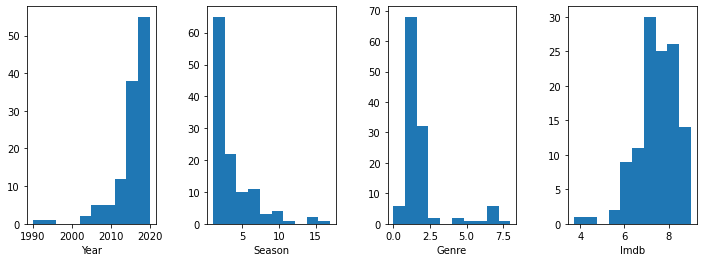

In [160]:
#10. Now that the data have been cleaned and you know some basic statistics on the data, use k-means clustering
# to determine whether shows with high imdb scores share any year, season, or genre attributes.
# Use as many additional cells as needed:
# a. show your work and explain each major step
# b. write a short paragraph (2-3 sentences) to explain your conclusion
fig = plt.figure(figsize=(12,4))
plt.subplot(1,4,1)   # 1 row, 3 cols, subplot 1
plt.subplots_adjust(hspace=0.4,wspace=0.4)
plt.hist(clean_data['year'])
plt.xlabel("Year")
plt.subplot(1,4,2)   # 1 row, 3 cols, subplot 1
plt.hist(clean_data['season'])
plt.xlabel("Season")
plt.subplot(1,4,3)   # 1 row, 3 cols, subplot 1
plt.hist(clean_data['genre'])
plt.xlabel("Genre")
plt.subplot(1,4,4)   # 1 row, 3 cols, subplot 1
plt.hist(clean_data['imdb'])
plt.xlabel("Imdb")


In [161]:
# There are more Amzon prime TV shows in receent years
# Many of the TV shows have less  number of series
# Most of the shows Genre is either Drama or Comedy
# imdb data seems like Gaussian distribution and hence data is good sample data

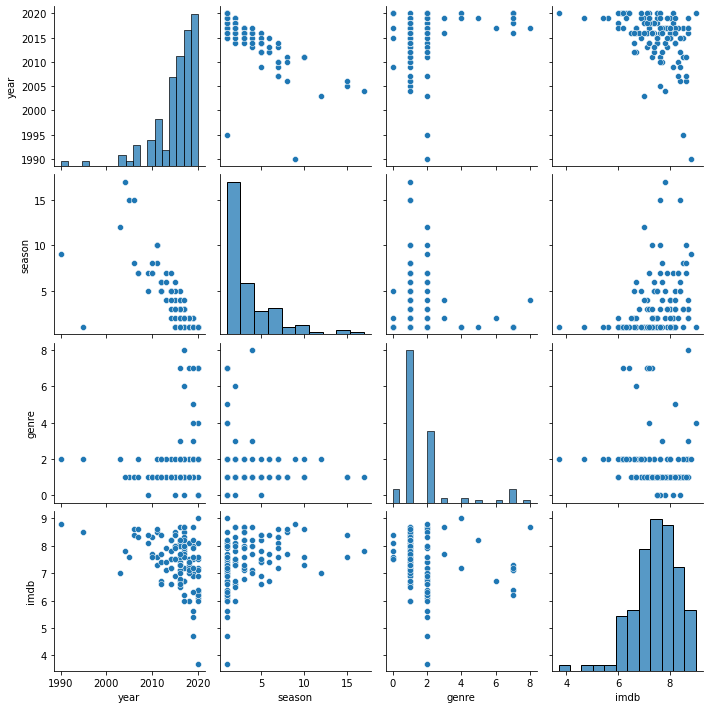

In [162]:
import seaborn as sns
sns.pairplot(clean_data)

In [163]:
# Finding the relationship between year and imdb score
X = clean_data.drop(columns=['season','genre'])
print(X.columns.values)

['year' 'imdb']


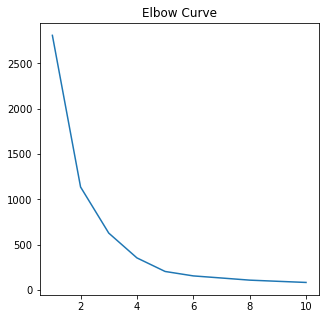

In [164]:
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++')   # k-means++ is a good general purpose seed value for randomly selecting the initial centroids
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
fig = plt.figure(figsize=(5,5))
plt.title("Elbow plot")
plt.plot(np.arange(1,11),wcss)
plt.title('Elbow Curve')
plt.show()

In [167]:
# From the above data k =3 seems optimal value
kmeans = KMeans(n_clusters=3,init='k-means++')
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
print(y_kmeans)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 1 1 0 1 0 1 0 0 0 0 0 0 0 1 1 0 0
 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 2 0 1 1 0 0 2 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0]


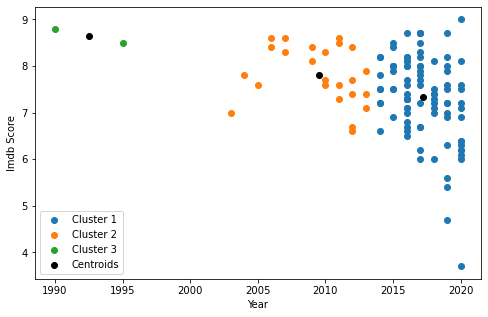

In [168]:
fig = plt.figure(figsize=(8,5))
plt.scatter(X[y_kmeans == 0].year, X[y_kmeans == 0].imdb, label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1].year, X[y_kmeans == 1].imdb, label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2].year, X[y_kmeans == 2].imdb, label = 'Cluster 3')
# plt.scatter(X[y_kmeans == 3].year, X[y_kmeans == 3].imdb, label = 'Cluster 4')
# plt.scatter(X[y_kmeans == 4].year, X[y_kmeans == 4].imdb, label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c = 'black', label = 'Centroids')
plt.xlabel('Year')
plt.ylabel('Imdb Score')
plt.legend()
plt.show()

In [178]:
#Old shows have high imdb values compared to recent year shows.

['season' 'imdb']


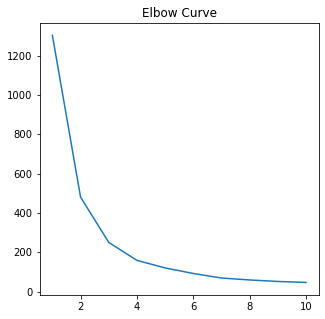

In [171]:
X = clean_data.drop(columns=['year','genre'])
print(X.columns.values)
wcss=[]
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++')
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
fig = plt.figure(figsize=(5,5))
plt.plot(np.arange(1,11),wcss)
plt.title('Elbow Curve')
plt.show() 

In [173]:
kmeans=KMeans(n_clusters=3,init='k-means++')
kmeans.fit(X)
y_kmeans=kmeans.predict(X)

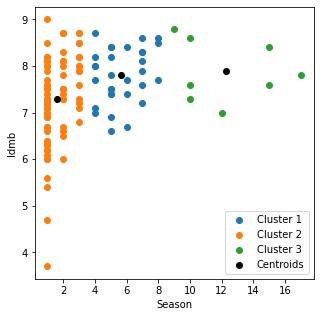

In [174]:
fig = plt.figure(figsize=(5,5))
plt.scatter(X[y_kmeans == 0].season, X[y_kmeans == 0].imdb, label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1].season, X[y_kmeans == 1].imdb, label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2].season, X[y_kmeans == 2].imdb, label = 'Cluster 3')
# plt.scatter(X[y_kmeans == 3].age, X[y_kmeans == 3].spend, label = 'Cluster 4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c = 'black', label = 'Centroids')
plt.xlabel('Season')
plt.ylabel('Imdb')
plt.legend()
plt.show()

In [ ]:
# Most of the imdb score shows have less number of season


['genre' 'imdb']


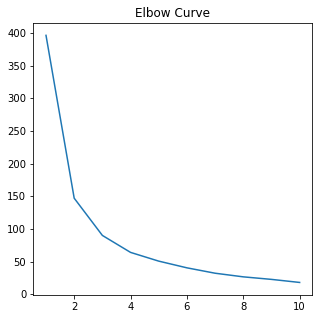

In [175]:
X = clean_data.drop(columns=['year','season'])
print(X.columns.values)
wcss=[]
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++')
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
fig = plt.figure(figsize=(5,5))
plt.plot(np.arange(1,11),wcss)
plt.title('Elbow Curve')
plt.show() 

In [176]:
kmeans=KMeans(n_clusters=3,init='k-means++')
kmeans.fit(X)
y_kmeans=kmeans.predict(X)

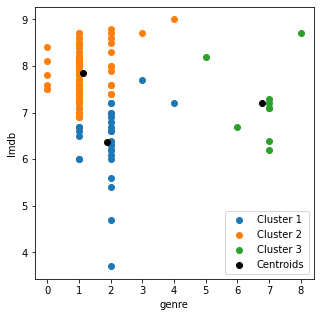

In [179]:
fig = plt.figure(figsize=(5,5))
plt.scatter(X[y_kmeans == 0].genre, X[y_kmeans == 0].imdb, label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1].genre, X[y_kmeans == 1].imdb, label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2].genre, X[y_kmeans == 2].imdb, label = 'Cluster 3')
# plt.scatter(X[y_kmeans == 3].age, X[y_kmeans == 3].spend, label = 'Cluster 4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c = 'black', label = 'Centroids')
plt.xlabel('genre')
plt.ylabel('Imdb')
plt.legend()
plt.show()

In [ ]:
# genre 0 and 1 have more imdb score

In [ ]:
# Determine whether shows with high imdb scores share any year, season, or genre attributes.
# Final conclusions.
# Except genre 2 all other genrs has imdb scores >= 6
# More number of seasons the higher the number of imdb score
# Older year moves have high imdb score